In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Intro to PCA
Now let's look at what PCA does using a toy data set. First, load the % sample PCA data. The columns of this matrix are the values of two % correlated measurements (e.g. height and body weight). Load this data % set...

In [2]:
from scipy.io import loadmat
pca_example = loadmat('pca_example.mat')

In [3]:
#See what's in here
pca_example.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

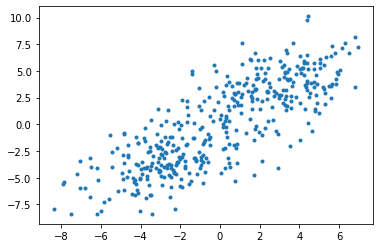

In [10]:
#Plot the data as a scatter plot. What are the shapes?
X = pca_example['X']
plt.plot(X[:,0], X[:,1], '.')

What do you notice? As a reminder, in order to calculate the eigenvectors, our data must be centered around the mean values of each variable

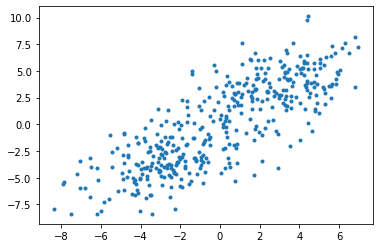

In [95]:
X = X - np.mean(X, axis=0)
#center the data and re-plot
plt.plot(X[:,0], X[:,1], '.')

Calculate the eigenvectors and eigenvalues of your data matrix

In [13]:
#Calculate the sample covariance matrix

#your code here
C = X.T.dot(X) / (X.shape[0] - 1)

In [32]:
#Take the eigendecomposition
eigs, evecs = np.linalg.eig(C)
#convert eigs to numpy array
eigs = np.array(eigs)

In [40]:
#Interestingly, these are not sorted. Sort them by size of eigenvalue. Hint: use np.argsort. How do
#we reverse direction of an array using just indexing?

#your code here
sort_idx = np.argsort(eigs)[::-1]
eigs = eigs[sort_idx]
evecs = evecs[:, sort_idx]

Now plot the directions of each eigenvector, scaled by its eigenvalue, onto the data

In [41]:
#your code here
V0_scaled = evecs[:, 0] * eigs[0]
V1_scaled = evecs[:, 1] * eigs[1]

(-10, 10)

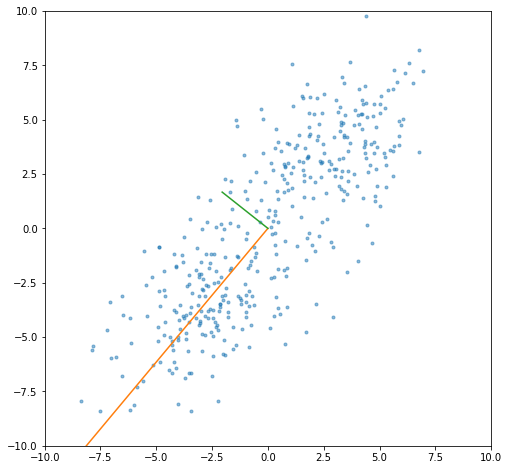

In [47]:
#your code here
plt.figure(figsize=(8, 8))
plt.plot(X[:,0], X[:,1], '.', alpha=0.5)
plt.plot([0, V0_scaled[0]], [0, V0_scaled[1]])
plt.plot([0, V1_scaled[0]], [0, V1_scaled[1]])
plt.xlim([-10, 10])
plt.ylim([-10, 10])

Now explicitly project the data onto each of these two PCs separately. Plot histograms of these projections and observe the variance. Which is bigger?

In [51]:
PC1 = evecs[:, 0]
PC2 = evecs[:, 1]

#your code here
proj1 = PC1.dot(X.T)
proj2 = PC2.dot(X.T)

(-11, 11)

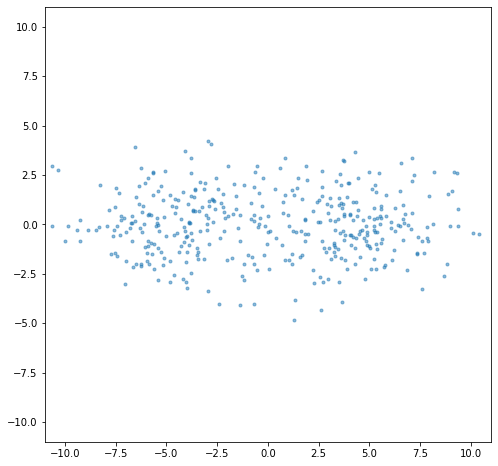

In [53]:
#first plot the projections themselves in 2D
plt.figure(figsize=(8, 8))
plt.plot(proj1, proj2, '.', alpha=0.5)
plt.xlim([-11, 11])
plt.ylim([-11, 11])

(array([10., 36., 60., 60., 40., 39., 72., 53., 23.,  7.]),
 array([-10.65821236,  -8.44779403,  -6.23737571,  -4.02695738,
         -1.81653905,   0.39387928,   2.60429761,   4.81471593,
          7.02513426,   9.23555259,  11.44597092]),
 <a list of 10 Patch objects>)

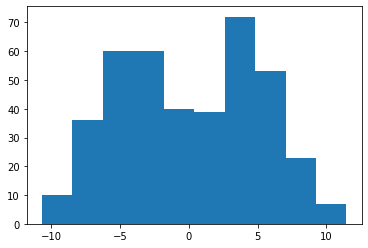

In [54]:
#Now plot histograms separately

#your code here
plt.figure()
plt.hist(proj1)

(array([ 6.,  5., 25., 55., 80., 95., 62., 41., 23.,  8.]),
 array([-4.83507263, -3.92877395, -3.02247527, -2.1161766 , -1.20987792,
        -0.30357924,  0.60271943,  1.50901811,  2.41531679,  3.32161546,
         4.22791414]),
 <a list of 10 Patch objects>)

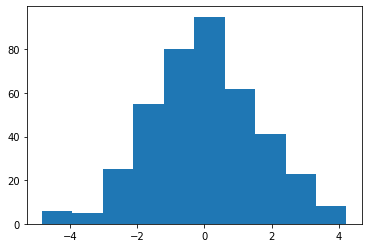

In [55]:
plt.figure()
plt.hist(proj2)

## 4. Dimensionality reduction via PCA: Gene expression
We can use PCA to understand large data sets with many variables. In this data set, the expression levels of 208 genes has been measured under 79 conditions. Each of these genes has also been classified with a category. GeneData.mat contains a struct with two fields. Let's load it and take a look.

In [56]:
GeneData = loadmat('GeneData.mat')

In [73]:
#GeneData is a matlab "struct". This makes our lives slightly harder. Play around with it, using type(),
#.keys(), len(), .shape, etc. to try to unpack it until you find familiar python stuff

#your code here
print(GeneData.keys())
print(GeneData['GeneData'].shape)
print(len(GeneData['GeneData'][0, 0]))
print(GeneData['GeneData'][0, 0][0].shape)
print(GeneData['GeneData'][0, 0][1].shape)

dict_keys(['__header__', '__version__', '__globals__', 'GeneData'])
(1, 1)
2
(1, 208)
(79, 208)


The first field is the category of each gene (TCA: tricarboxylic acid cycle, Resp: respiration, Ribo: Cytoplasmatic ribosomal proteins, Prot: Proteasome, Hist: Histones)

In [75]:
GeneData['GeneData'][0, 0][0].shape

(1, 208)

In [81]:
#What are the unique entries in here?
np.unique(GeneData['GeneData'][0, 0][0])

array([array(['Hist'], dtype='<U4'), array(['Prot'], dtype='<U4'),
       array(['Resp'], dtype='<U4'), array(['Ribo'], dtype='<U4'),
       array(['TCA'], dtype='<U3')], dtype=object)

In [84]:
#Unpack them in a meaningful way as strings
category = [GeneData['GeneData'][0, 0][0][0, i][0] for i in range(GeneData['GeneData'][0, 0][0].shape[1])]

In [86]:
print(category)

['Resp', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Prot', 'Prot', 'Ribo', 'Prot', 'Ribo', 'Resp', 'Prot', 'Prot', 'Hist', 'Ribo', 'Resp', 'Prot', 'Prot', 'Ribo', 'Resp', 'Prot', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Resp', 'Ribo', 'TCA', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Hist', 'Hist', 'Ribo', 'Ribo', 'Prot', 'Ribo', 'Resp', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'TCA', 'Ribo', 'Ribo', 'Prot', 'Ribo', 'Ribo', 'Ribo', 'Resp', 'Prot', 'Ribo', 'Ribo', 'Prot', 'Ribo', 'Resp', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'TCA', 'Prot', 'Hist', 'Hist', 'Resp', 'TCA', 'Ribo', 'Resp', 'Ribo', 'Hist', 'Ribo', 'Ribo', 'Prot', 'Ribo', 'TCA', 'Resp', 'TCA', 'Ribo', 'Ribo', 'Ribo', 'TCA', 'Resp', 'Prot', 'Ribo', 'TCA', 'Ribo', 'Ribo', 'Ribo', 'Ribo', 'Resp', 'Prot', 'Ribo', 'Ribo', 'Ribo', 'Resp', 'Ribo', 'Ribo', 'Ribo', 'Resp', 'Prot', 'Ribo', 'Ribo', 'Ribo', 'Hist', 'Resp', 'TCA', 'Ribo', 'Ribo', 'Hist', 'Resp', 'Resp', 'Prot', 'Prot', 'Prot', 'Ribo', 

In [87]:
#Get just the unique category names
set(category)

{'Hist', 'Prot', 'Resp', 'Ribo', 'TCA'}

The second field contains the change in expression levels of each of the 208 genes in each of the 79 experimental condition relative to baseline. Increases and decreases of expression level are reported by positive and negative values, respectively.

Consider first two experimental conditions, in a 2D scatter plot, plot the expression levels of condition 2 as a function of condition 1 and color the points according to the gene categories

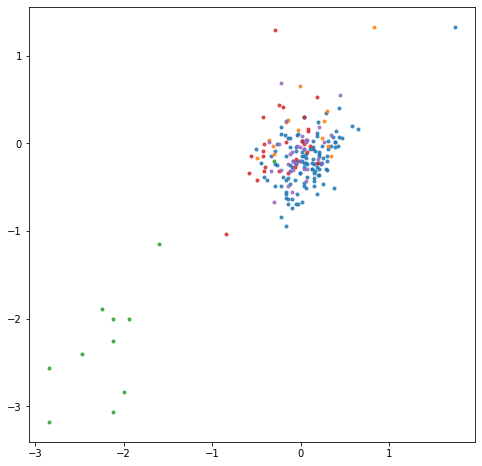

In [94]:
#your code here
expression = GeneData['GeneData'][0, 0][1]
plt.figure(figsize=(8, 8))
for cat in set(category):
    cat_idx = [i for i in range(len(category)) if category[i] == cat]
    plt.plot(expression[0, cat_idx], expression[1, cat_idx], '.', alpha=0.8)

Do you notice any structure in the data? Can you cluster the data based on these two conditions?

This doesn't seem to be very informative. We can tell the hist genes apart from the others, but the rest are clumped together, Lets see if PCA can help us differentiate the groups of gene classes based on their change in expression over the 79 trials. To do this, we would like to reduce the dimensionality of the trials in order to visualize each gene's expression pattern in a lower dimension.

In [96]:
#First subtract out the mean

#your code here
exp_centered = expression - np.mean(expression, axis=0)

In [108]:
#Take the first few principle components. This time do it by the SVD instead of eigenvalues, for fun.

#your code here
U, S, VT = np.linalg.svd(exp_centered.T)

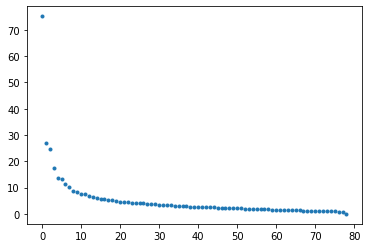

In [109]:
#Plot the singular values

#your code here
plt.plot(S, '.')

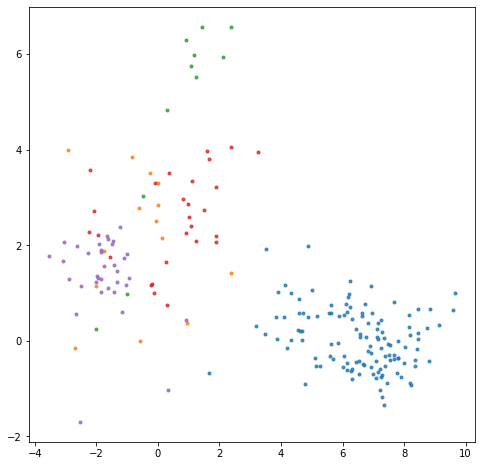

In [110]:
#Plot the data, color-coded by category, projected onto the first 2 principle components

#your code here
plt.figure(figsize=(8, 8))
exp_proj = VT[:2,:].dot(exp_centered)
for cat in set(category):
    cat_idx = [i for i in range(len(category)) if category[i] == cat]
    plt.plot(exp_proj[0, cat_idx], exp_proj[1, cat_idx], '.', alpha=0.8)

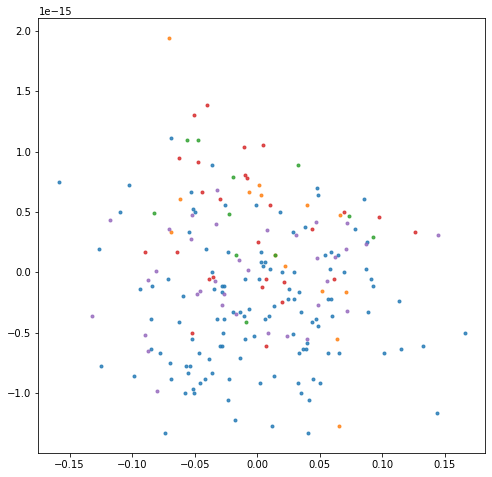

In [111]:
#Plot the data, color-coded by category, projected onto the LAST 2 principle components. Is this as helpful?

#your code here
plt.figure(figsize=(8, 8))
exp_proj = VT[-2:,:].dot(exp_centered)
for cat in set(category):
    cat_idx = [i for i in range(len(category)) if category[i] == cat]
    plt.plot(exp_proj[0, cat_idx], exp_proj[1, cat_idx], '.', alpha=0.8)

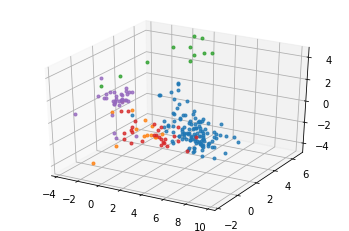

In [112]:
#Now plot the first 3 principal components in a 3D plot and rotate it around
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
exp_proj = VT[:3,:].dot(exp_centered)
for cat in set(category):
    cat_idx = [i for i in range(len(category)) if category[i] == cat]
    ax.plot(exp_proj[0, cat_idx], exp_proj[1, cat_idx], exp_proj[2, cat_idx], '.', alpha=0.8)

## 5. Dimensionality reduction via PCA: Reaching task
Now, lets use PCA to analyze neural activity in motor cortex of monkeys during a reaching task. First, load the reaching data set:

In [113]:
ReachData = loadmat('ReachData.mat')

In [114]:
#You're on your own! Use tools from previous problems to explore these data.

%% 3. Intro to PCA
% now let's look at what PCA does using a toy data set. First, load the
% sample PCA data. The columns of this matrix are the values of two
% correlated measurements (e.g. height and body weight). Load this data
% set...

load ('pca_example.mat')

% Plot the data
figure(5)
subplot(1,3,1)
plot(X(:,1),X(:,2),'k.', 'DisplayName', 'data')

% What do you notice? As a reminder, in order to calculate the
% eigenvectors, our data must be centered around the mean values of each
% variable

X = X - mean(X); %center the data and re-plot
figure(5)
subplot(1,3,1)
plot(X(:,1),X(:,2),'k.', 'DisplayName', 'data')

% Calculate the eigenvectors and eigenvalues of your data matrix

C=X'*X/(499); % find the covariance matrix
[V,D]=eig(C); 
[d,ind] = sort(diag(D), 'descend'); 
% unlike the SVD, eig() does not return sorted eigenvalues
D = D(ind,ind);
V = V(:,ind);

% The columns of V are the eigenvectors (principal components) of our data matrix
PC1 =V(:,1);
PC2 = V(:,2);

% Now, plot the axes of greatest variance (the eigenvectors * eigenvalues)
v1=V(:,1)*(D(1,1)); 
v2=V(:,2)*(D(2,2));

subplot(1,3,1)
hold on
plot([0 v1(1)],[0 v1(2)],'b-', 'LineWidth', 2, 'DisplayName', 'PC 1');
hold on
plot([0 v2(1)],[0 v2(2)],'r-', 'LineWidth', 2, 'DisplayName', 'PC 1');
l = legend;
l.Position = [0.0838 0.5611 0.1782 0.2062];
axis equal
xlim([-10, 10])
ylim([-10, 10])
grid on

set(gca,'fontsize',18)

% We can use the axes we just extracted to reduce the dimensionality of our
% data (i.e., represent our data in one of the two dimensions that
% represent the greatest variance in the data set). We do this by
% projecting our data on to these principal component axes
 
projPC1 = (X*PC1)'.*PC1;
subplot(1,3,2)
plot(X(:,1),X(:,2),'k.')
hold on
scatter(projPC1(1,:), projPC1(2,:),10,'b','filled')
hold on
for ii = 1:length(X)
    plot([X(ii,1) projPC1(1,ii)], [X(ii,2) projPC1(2,ii)], 'color',[0.5, 0.5, 0.5])
end
axis equal
xlim([-10, 10])
ylim([-10, 10])
line(xlim, [0 0],'color',[.5 .5 .5]);
line([0 0], ylim,'color',[.5 .5 .5]);
grid on
title('Data projected onto 1st PC')
set(gca,'fontsize',18)


% Now project data onto second principal component

projPC2 = (X*PC2)'.*PC2;
subplot(1,3,3)
plot(X(:,1),X(:,2),'k.')
hold on
scatter(projPC2(1,:), projPC2(2,:),10,'r','filled')
hold on
for ii = 1:length(X)
    plot([X(ii,1) projPC2(1,ii)], [X(ii,2) projPC2(2,ii)], 'color',[0.5, 0.5, 0.5])
end
axis equal
xlim([-10, 10])
ylim([-10, 10])
line(xlim, [0 0],'color',[.5 .5 .5]);
line([0 0], ylim,'color',[.5 .5 .5]);
grid on
title('Data projected onto 2nd PC')
set(gca,'fontsize',18)

f = figure(5);
f.Position = [1 41 1536 748.8000];
% While we don't need to reduce the dimensionality of this data set in
% order to more easily visualize it,we might use these axes to separate
% out groups within our data. Try plotting histograms of the data along the
% X, Y, and PC1 axes. Do you see a pattern within the data?

figure
nBins = 20;
subplot(3,1,1)
histogram(X(:,1), nBins)
ylabel('counts')
title('Var 1')

subplot(3,1,2)
histogram(X(:,2), nBins)
ylabel('counts')
title('Var 2')

% now, plot a histogram of your data projected on the first principal
% component
subplot(3,1,3)
histogram(projPC1, nBins)
ylabel('counts')
title('Projection onto PC1')
%% Tidy your workspace
clear all
close all

%% 4. Dimensionality reduction via PCA: Gene expression
% We can use PCA to understand large data sets with many variables. In this
% data set, the expression levels of 208 genes has been measured under 79
% conditions. Each of these genes has also been classified with a category.
% GeneData.mat contains a struct with two fields. Let's load it and take a
% look.

% data from Brown et al 2000
load('GeneData.mat')

% The first field is the category of
% each gene (TCA: tricarboxylic acid cycle, Resp: respiration, Ribo:
% Cytoplasmatic ribosomal proteins, Prot: Proteasome, Hist: Histones)

% The second field contains the change in expression levels of each of the
% 208 genes in each of the 79 experimental condition relative to baseline.
% Increases and decreases of expression level are reported by positive and
% negative values, respectively.

categoryLabels = GeneData.geneCategory';
expression = GeneData.geneExpression';
categories = unique(categoryLabels);
numCategories = length(unique(categoryLabels));


% Consider first two experimental conditions, in a 2D scatter plot, plot
% the expression levels of condition 2 as a function of condition 1 and
% color the points according to the gene categories
colors = lines(numCategories);
figure

for c = 1:numCategories
    hold on
    cat = find(strcmp(categoryLabels,categories{c}));
    scatter(expression(cat,1), expression(cat,2), 30, colors(c,:), 'filled', 'DisplayName', categories{c})
end
legend
set(gca,'fontsize',18)
xlabel('expression under condition 1')
ylabel('expression under condition 2')

% Do you notice any structure in the data? Can you cluster the data based
% on these two conditions? 

% This doesn't seem to be very informative. We can tell the hist genes
% apart from the others, but the rest are clumped together

% Lets see if PCA can help us differentiate the groups of gene classes
% based on their change in expression over the 79 trials. To do this, we
% would like to reduce the dimensionality of the trials in order to
% visualize each gene's expression pattern in a lower dimension. 

% First, center the data (remember to correctly orient your data matrix 

exp_centered = expression - mean(expression);

% Take SVD/compute eigenvectors of X'X 
[V,D]=eig(exp_centered'*exp_centered);
[d,ind] = sort(diag(D), 'descend');
D = D(ind,ind);
V = V(:,ind);

% Plot the singular values (or eigenvalues) in each principal direction
% (this captures how spread out your data is when projected down to the
% corresponding principal component)  
figure
plot(d, '.', 'MarkerSize', 20);
xlabel('principal component')
ylabel('spread')
set(gca,'fontsize',18)

% What does the data look like projected onto the first principal axes?

% Because we sorted the principal axes (eigenvectors) based on their eigenvalues, these
% axes should capture the greatest variability within the data.
projectPC12 = exp_centered*V(:,1:2);
figure
for c = 1:numCategories
    hold on
    cat = find(strcmp(categoryLabels,categories{c}));
    scatter(projectPC12(cat,1), projectPC12(cat,2), 30, colors(c,:), 'filled', 'DisplayName', categories{c})
end
legend
set(gca,'fontsize',18)
xlabel('PC1')
ylabel('PC2')

% What does the data look like in based on the last two PCs? 

%Conversely, these axes should capture the least variability within the data
projectPC12 = exp_centered*V(:,end-1:end);
figure
for c = 1:numCategories
    hold on
    cat = find(strcmp(categoryLabels,categories{c}))';
    scatter(projectPC12(cat,1), projectPC12(cat,2), 30, colors(c,:), 'filled', 'DisplayName', categories{c})
end
legend
set(gca,'fontsize',18)
xlabel('second to last PC')
ylabel('last PC')

% Project data onto first 3 principal components and show in 3d
proj_3pcs = exp_centered*V(:,1:3);
figure
for c = 1:numCategories
    hold on
    cat = find(strcmp(categoryLabels,categories{c}))';
    scatter3(proj_3pcs(cat,1), proj_3pcs(cat,2), proj_3pcs(cat,3))
end
rotate3d on
grid on
xlabel('PC1')
ylabel('PC2')
zlabel('PC3')
%% Tidy your workspace
clear all
close all

%% 5. Dimensionality reduction via PCA: Reaching task
% Now, lets use PCA to analyze neural activity in motor cortex of monkeys
% during a reaching task. First, load the reaching data set:

load ('ReachData.mat')

% This data set contains neural signals recorded in macaque motor cortex
% during a center-out reaching task. The variable "R" contains the firing
% rate of 143 neurons recording during 158 trials, while the variable
% "direction" encodes the direction of the reach on each trial (direction 1
% is rightward, direction 2 is 45 deg, direrction 3 to straight forward (90
% deg) etc). 

directions = unique(direction);
numDirections = length(unique(directions));

% We would like to capture the total response (the activity of all 143
% neurons) in a format that is easier for us to visualize and interpret
% (i.e., in 2D). Ultimately we would like to see if we can predict the
% reach condition based on this measure of neural activity. 

% Before we start decomposing our data matrix, make sure you have the data
% in the correct orientation! We want the dimension that we are going to
% reduce (in this case, the 143 neurons) as the row variable

R = R';

% What is the interpretation of dimensional reduction along the other
% dimension (the trials)?

% Separating the activity of each neuron across all conditions

% Can you tell the reach direction from the firing rate of just two neurons?
% In a 2D scatter plot, plot the activity of the first neuron as a function
% of the second neuron and color the points according to the different
% direction for that trial. Does it look like the responses of these two
% neurons during each reaching condition is distinct from the responses
% during other conditions?

colors = jet(numDirections); % make a color map to color code the plot based on the reach condition
figure
for d = 1:numDirections
    hold on
    dirs = find(direction == directions(d));
    scatter(R(dirs,1), R(dirs,2), 30, colors(d,:), 'filled', 'DisplayName',['direction ' num2str(directions(d))])
end
legend
xlabel('Neuron 1 Firing Rate');
ylabel('Neuron 2 Firing rate');

% Use PCA in order to visualize the data from all the neurons in a lower
% dimension, and hopefully we will be able to separate out the different
% reach conditions!

% center the data and save to variable C, then get the eigenvalues of C'C.
% The columns of V will be the principal axes
C = R-mean(R);
[V,D]=eig(C'*C);
[d,ind] = sort(diag(D), 'descend');
D = D(ind,ind);
V = V(:,ind);

% Plot the singular values (or eigenvalues) in each principal direction
% (this captures how spread out your data is when projected down to the
% corresponding principal component)  
figure
plot(d, '.', 'MarkerSize', 20);
xlabel('principal component')
ylabel('spread')
set(gca,'fontsize',18)

% What does the data look like projected onto the first two principal axes?
% This will give us a 2D plot of the data we can easily visualize. Color
% each point based on the reach condition during that trial. 
projectPC12 = R*V(:,1:2);
figure
for d = 1:numDirections
    hold on
    dirs = find(direction == directions(d));
    scatter(projectPC12(dirs,1), projectPC12(dirs,2), 30, colors(d,:), 'filled', 'DisplayName',['direction ' num2str(directions(d))])
end
legend
set(gca,'fontsize',18)
xlabel('PC1')
ylabel('PC2')
